In [2]:
# read and import
import pandas as pd

# read the Excel file
df = pd.read_excel("emission.xlsx")

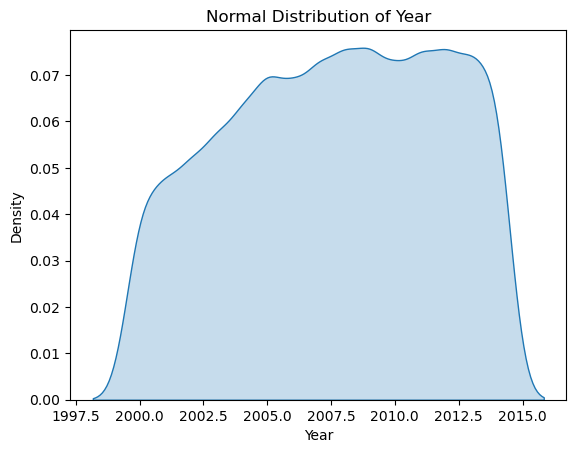

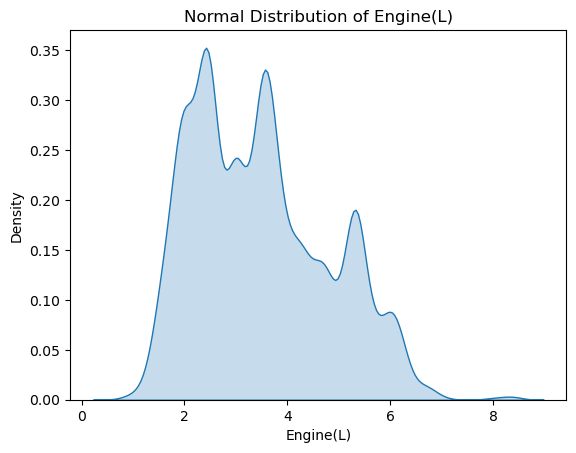

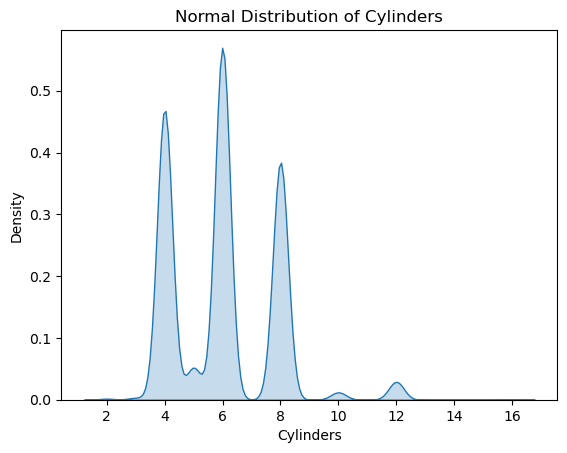

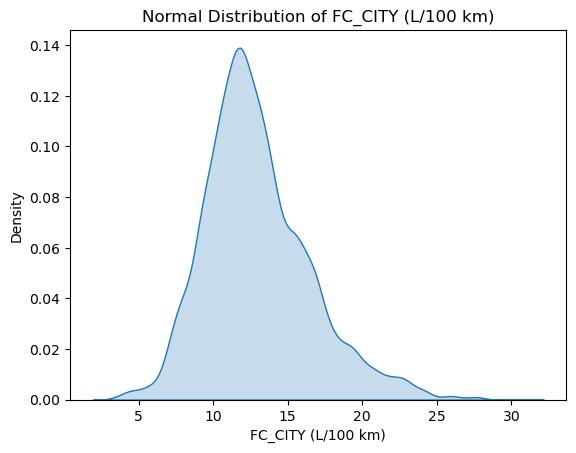

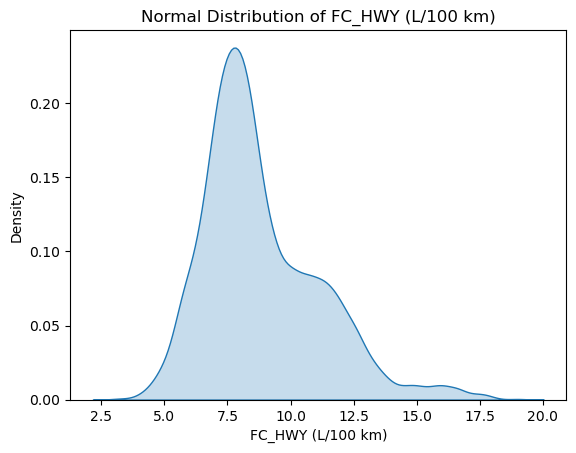

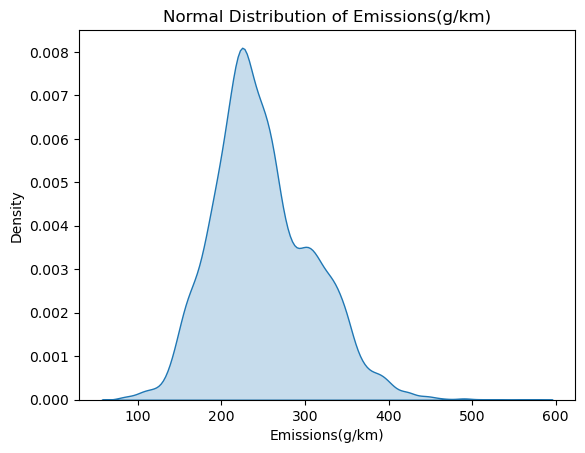

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("emission.xlsx")
distribution = ['Year', 'Engine(L)', 'Cylinders', 'FC_CITY (L/100 km)', 'FC_HWY (L/100 km)', 'Emissions(g/km)']


for variable in distribution:
    sns.kdeplot(df[variable], fill=True)
    plt.title(f"Normal Distribution of {variable}")
    plt.show()


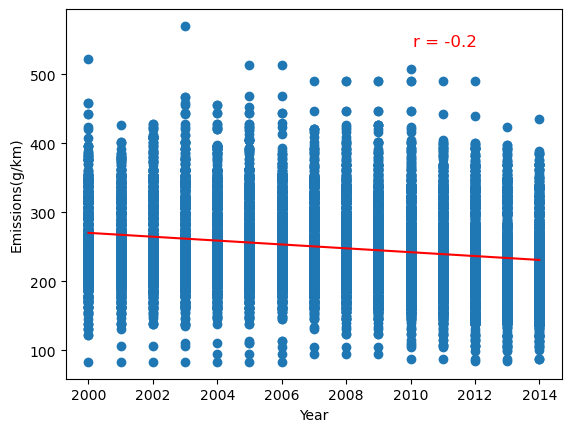

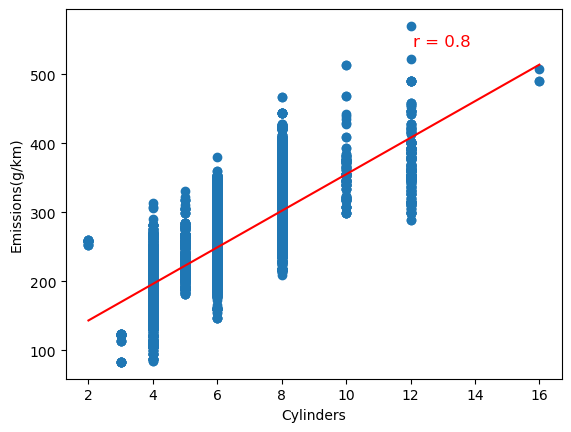

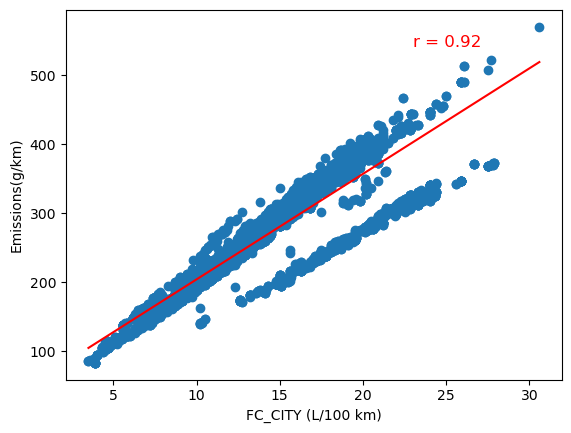

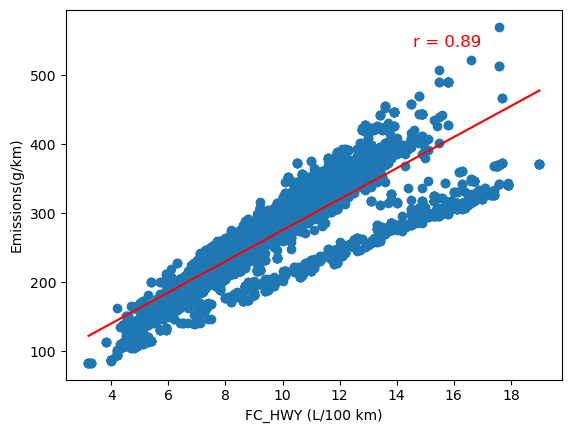

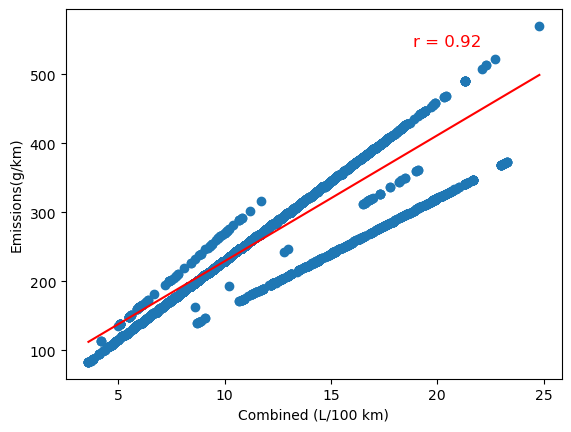

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Define the variables to compare
comparison = ['Year', 'Cylinders', 'FC_CITY (L/100 km)', 'FC_HWY (L/100 km)', 'Combined (L/100 km)']

# Plot scatter plot for each variable
for var in comparison:
    # Create scatter plot
    plt.scatter(df[var], df['Emissions(g/km)'])
    plt.xlabel(var)
    plt.ylabel('Emissions(g/km)')
    
    # Calculate and add line of best fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[var], df['Emissions(g/km)'])
    x = np.array([df[var].min(), df[var].max()])
    y = slope * x + intercept
    plt.plot(x, y, color='red')
    
    # Add r value to plot
    r_label = f'r = {round(r_value, 2)}'
    plt.annotate(r_label, xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')
    
    # Show the plot
    plt.show()


In [5]:
# Import pandas library
import pandas as pd

# Read in the data
pd.read_excel("emission.xlsx")

# Define list of variables to calculate stats for
all_variables = ['Make', 'Model(#)', 'Vehicle Class', 'Engine(L)', 'Cylinders', 'Transmission', 'FuelType',
                 'FC_CITY (L/100 km)', 'FC_HWY (L/100 km)',
                 'Combined (L/100 km)', 'COMB (mpg)', 'Emissions(g/km)']

# Calculate descriptive statistics for each variable
for variable in all_variables:
    print(f"Descriptive statistics for {variable}:")
    print(df[variable].describe())
    print("\n")


Descriptive statistics for Make:
count         14253
unique           51
top       CHEVROLET
freq           1464
Name: Make, dtype: object


Descriptive statistics for Model(#):
count     14253
unique     2518
top       JETTA
freq         74
Name: Model(#), dtype: object


Descriptive statistics for Vehicle Class:
count     14253
unique       17
top         SUV
freq       2640
Name: Vehicle Class, dtype: object


Descriptive statistics for Engine(L):
count    14253.000000
mean         3.477850
std          1.311102
min          0.800000
25%          2.400000
50%          3.400000
75%          4.400000
max          8.400000
Name: Engine(L), dtype: float64


Descriptive statistics for Cylinders:
count    14253.000000
mean         5.991230
std          1.774154
min          2.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         16.000000
Name: Cylinders, dtype: float64


Descriptive statistics for Transmission:
count     14253
unique       24
top          A

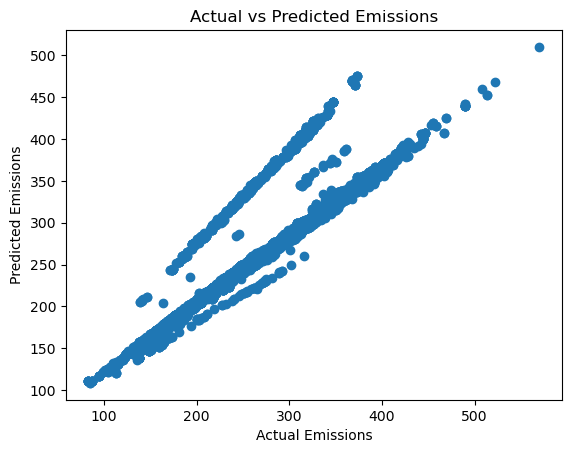

Model summary:
R-squared: 0.84
Mean Squared Error: 546.45


Coefficients:
FC_CITY (L/100 km): -5.497380357288482
FC_HWY (L/100 km): -10.24378443316081
Combined (L/100 km): 32.677719596291205
Intercept: 47.9781391273724
R-squared: 0.84
Mean Squared Error: 546.45


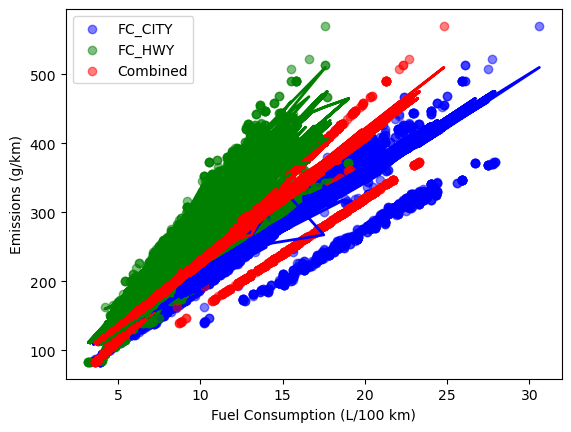

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select the variables for the MLR model
X_cols = ['FC_CITY (L/100 km)', 'FC_HWY (L/100 km)', 'Combined (L/100 km)']
y_col = 'Emissions(g/km)'

# Fit the MLR model
X = df[X_cols]
y = df[y_col]
mlr = LinearRegression().fit(X, y)

# Print the coefficients
print('Coefficients:')
for i, col in enumerate(X_cols):
    print(f'{col}: {mlr.coef_[i]}')
print(f'Intercept: {mlr.intercept_}')

# Evaluate the model
y_pred = mlr.predict(X)
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'R-squared: {r_squared:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

# Plot the scatter plot
fig, ax = plt.subplots()
ax.scatter(X[X_cols[0]], y, color='blue', alpha=0.5)
ax.scatter(X[X_cols[1]], y, color='green', alpha=0.5)
ax.scatter(X[X_cols[2]], y, color='red', alpha=0.5)
ax.plot(X[X_cols[0]], mlr.predict(X), color='blue', linewidth=2)
ax.plot(X[X_cols[1]], mlr.predict(X), color='green', linewidth=2)
ax.plot(X[X_cols[2]], mlr.predict(X), color='red', linewidth=2)
ax.set_xlabel('Fuel Consumption (L/100 km)')
ax.set_ylabel('Emissions (g/km)')
ax.legend(['FC_CITY', 'FC_HWY', 'Combined'])
plt.show()


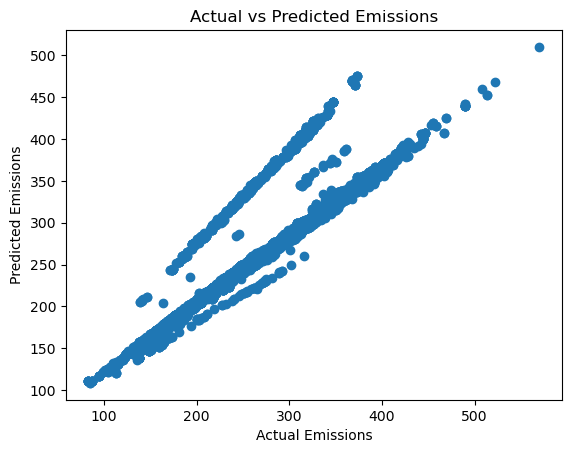

Model summary:
R-squared: 0.84
Mean Squared Error: 546.45


In [15]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define the variables for the linear regression model
X_cols = ['FC_CITY (L/100 km)', 'FC_HWY (L/100 km)', 'Combined (L/100 km)']
y_col = 'Emissions(g/km)'

# Fit the linear regression model
X = df[X_cols]
y = df[y_col]
lin_reg = LinearRegression().fit(X, y)

# Make predictions using the linear regression model
y_pred = lin_reg.predict(X)

# Calculate the R-squared
r_squared = r2_score(y, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Actual vs Predicted Emissions')
plt.show()

# Print the model summary
print('Model summary:')
print(f'R-squared: {r_squared:.2f}')
print(f'Mean Squared Error: {mse:.2f}')


In [18]:


# Calculate the average FC_CITY, FC_HWY, and Combined for each make
df_means = df.groupby('Make')[['FC_CITY (L/100 km)', 'FC_HWY (L/100 km)', 'Combined (L/100 km)']].mean().reset_index()

# Sort the makes by Combined in descending order
df_top = df_means.sort_values('Combined (L/100 km)', ascending=False).head(5)
df_bottom = df_means.sort_values('Combined (L/100 km)', ascending=True).head(5)

# Print the top 5 and bottom 5 makes
print('Top 5 makes:')
print(df_top)
print('\nBottom 5 makes:')
print(df_bottom)


Top 5 makes:
           Make  FC_CITY (L/100 km)  FC_HWY (L/100 km)  Combined (L/100 km)
6       BUGATTI           26.566667          15.500000            21.566667
13      FERRARI           21.683562          13.202740            17.869863
4       BENTLEY           20.708065          12.553226            17.043548
25  LAMBORGHINI           20.572549          12.500000            16.929412
29     MASERATI           18.106522          11.158696            15.169565

Bottom 5 makes:
          Make  FC_CITY (L/100 km)  FC_HWY (L/100 km)  Combined (L/100 km)
44       SMART            5.635294           4.588235             5.152941
14        FIAT            7.210000           5.590000             6.495000
32        MINI            8.001531           5.883163             7.055102
43       SCION            8.393548           6.270968             7.425806
1   ALFA ROMEO            9.100000           6.100000             7.700000
